### Try to analyze and categorize targets by name.

In [1]:
import pandas as pd
import numpy as np

import os

In [2]:
input_dir = '../_data/lish-moa'

train = pd.read_csv(os.path.join(input_dir, 'train_features.csv'))
test = pd.read_csv(os.path.join(input_dir, 'test_features.csv'))

targets_scored = pd.read_csv(os.path.join(input_dir, 'train_targets_scored.csv'))
targets_nonscored = pd.read_csv(os.path.join(input_dir, 'train_targets_nonscored.csv'))

submission = pd.read_csv(os.path.join(input_dir, 'sample_submission.csv'))

In [3]:
tname_scored = [t for t in targets_scored if t not in ['sig_id']]
tname_nonscored = [t for t in targets_nonscored if t not in ['sig_id']]

In [4]:
ttype_scored = dict()
for t in tname_scored:
    ttype = t.split('_')[-1]
    ttype_scored[ttype] = ttype_scored.get(ttype, 0) + 1

In [5]:
ttype_nonscored = dict()
for t in tname_nonscored:
    ttype = t.split('_')[-1]
    ttype_nonscored[ttype] = ttype_nonscored.get(ttype, 0) + 1

In [6]:
targets_inhibitor = [t for t in tname_scored if t.endswith('_inhibitor')]

In [7]:
from statsmodels.graphics.correlation import plot_corr, plot_corr_grid

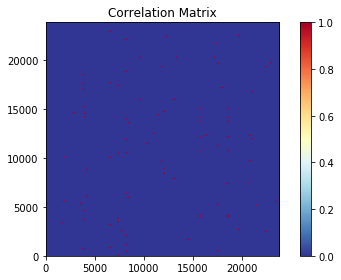

In [24]:
_ = plot_corr(targets_scored[targets_inhibitor])

In [37]:
corr_df = targets_scored[targets_inhibitor].corr().abs()

In [52]:
from matplotlib import pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = (12, 12)
def plot_corr(df):
    names = df.columns.tolist()
    correlations = df.corr()

    # plot correlation matrix
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0, len(names), 1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(names, rotation=70)
    ax.set_yticklabels(names)
    plt.show()

    return

In [46]:
tname_inhibitor = targets_inhibitor

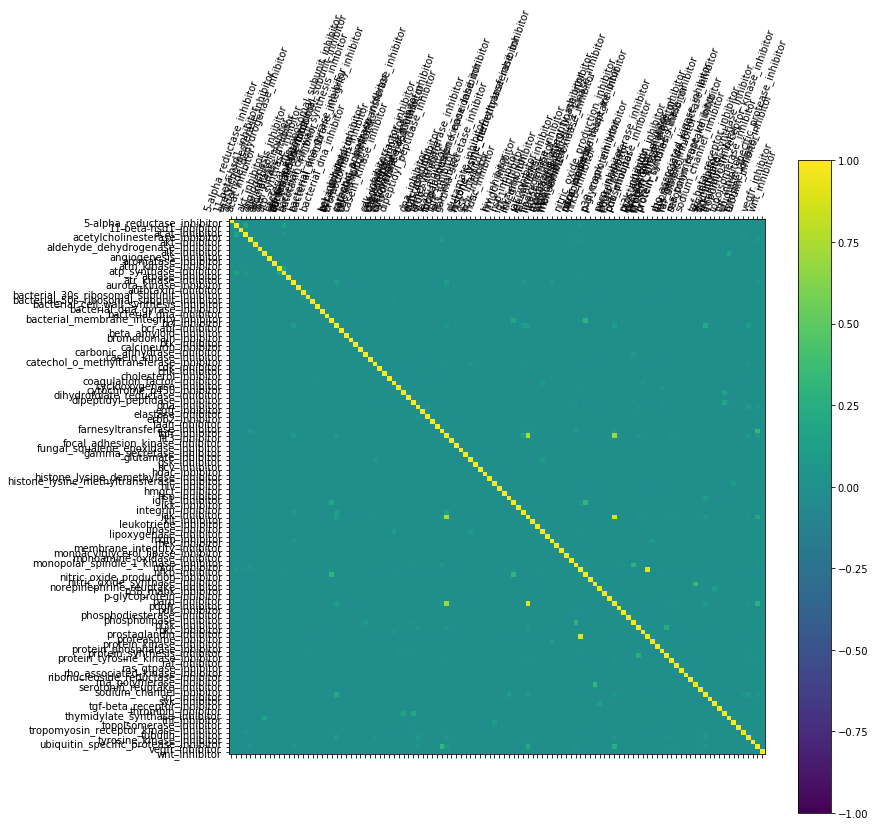

In [53]:
plot_corr(targets_scored[tname_inhibitor])

In [57]:
df_corr[df_corr > 0.2]

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
5-alpha_reductase_inhibitor,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11-beta-hsd1_inhibitor,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acat_inhibitor,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acetylcholine_receptor_agonist,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
acetylcholine_receptor_antagonist,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ubiquitin_specific_protease_inhibitor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
vegfr_inhibitor,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
vitamin_b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
vitamin_d_receptor_agonist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [58]:
df_corr = targets_scored.corr()
# N = len(tname_inhibitor)
N = len(tname_scored)

count = 0
for i in range(N):
    t1 = tname_scored[i]
    for j in range(i+1, N):
        t2 = tname_scored[j]
        c = df_corr.loc[t1, t2]
        if c > 0.2 or c < -0.2:
            print(t1, t2, c)
            count += 1
            
print('-' * 50)
print(f'Total : {count} pairs')
        

aldehyde_dehydrogenase_inhibitor trpv_agonist 0.5289501843839842
apoptosis_stimulant caspase_activator 0.40338145250195234
apoptosis_stimulant hiv_inhibitor 0.20004454612827563
apoptosis_stimulant nitric_oxide_production_inhibitor 0.24673365616164725
apoptosis_stimulant nrf2_activator 0.2010662967578985
bcl_inhibitor nitric_oxide_production_inhibitor 0.3105559981074745
bcl_inhibitor nrf2_activator 0.2532688896380811
bcr-abl_inhibitor src_inhibitor 0.22936950637520176
caspase_activator hiv_inhibitor 0.33245004409783147
caspase_activator topoisomerase_inhibitor 0.24973554775589604
chloride_channel_blocker glutamate_inhibitor 0.2560908578438819
fgfr_inhibitor vegfr_inhibitor 0.33391418712541016
flt3_inhibitor kit_inhibitor 0.7581117659978208
flt3_inhibitor pdgfr_inhibitor 0.7051192026218511
ikk_inhibitor nitric_oxide_production_inhibitor 0.31570944779396426
ikk_inhibitor nrf2_activator 0.2574825832358443
insulin_sensitizer ppar_receptor_agonist 0.4029770379736693
kit_inhibitor pdgfr_inhib

/Users/wcc/01_Projects/04_Practice/05_GAN/venv3/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


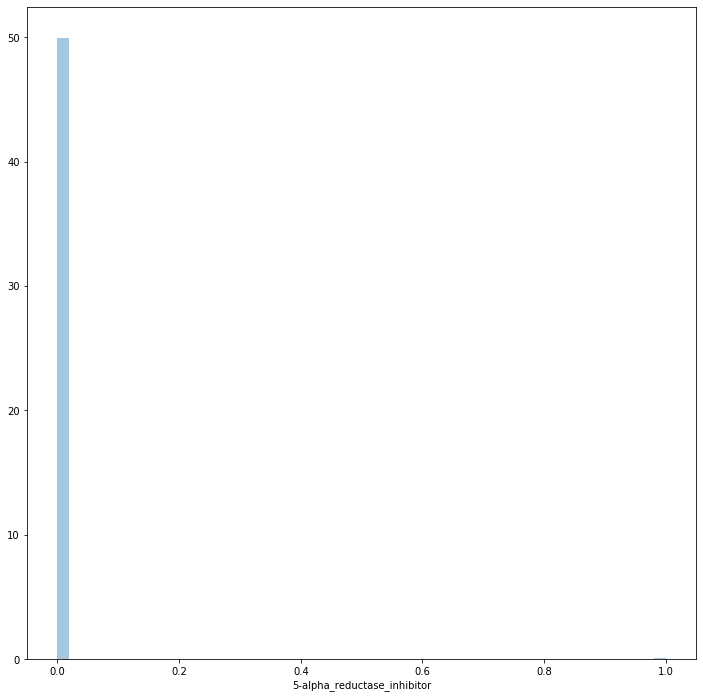

In [61]:
import seaborn as sns

t = tname_scored[0]
_ = sns.distplot(targets_scored[t])

In [76]:
t1 = tname_scored[0]
t1 = tname_scored[1]

d1 = targets_scored[t1]
d2 = targets_scored[t2]

v1 = d1.value_counts(normalize=True)[[0, 1]].values
v2 = d2.value_counts(normalize=True)[[0, 1]].values

print(v1, v2)

v1 @ v2

[9.99244142e-01 7.55857899e-04] [0.99874024 0.00125976]


0.9979862833406368

In [90]:
a = np.array([1, 3])
b = np.array([1, 4])

print(a, b, a@b, a*b)

[1 3] [1 4] 13 [ 1 12]


In [84]:
from scipy.spatial.distance import cosine

In [94]:
1 - cosine(a, b)

0.9970544855015815

In [95]:
1 - (v1 @ v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

1.2747310662586386e-07

In [96]:
cosine(v1, v2)

1.2747310662586386e-07

In [99]:
def bin_cos_similarity(v1, v2):
    cos_similarity = (v1 @ v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    
    return cos_similarity

In [102]:
bin_cos_similarity(v1, v2)

0.9999998725268934

In [101]:
v3 = d1.value_counts()[[0, 1]].values
v4 = d2.value_counts()[[0, 1]].values

bin_cos_similarity(v3, v4)

0.9999998725268933

In [103]:
N = len(tname_scored)

df = dict()
df['t1'] = []
df['t2'] = []
df['cos'] = []

for i in range(N):
    t1 = tname_scored[i]
    v1 = targets_scored[t1].value_counts().values
    for j in range(i+1, N):
        t2 = tname_scored[j]
        v2 = targets_scored[t2].value_counts().values
        
        cos_sim = bin_cos_similarity(v1, v2)
        
        df['t1'].append(t1)
        df['t2'].append(t2)
        df['cos'].append(cos_sim)

In [104]:
df = pd.DataFrame(df)
print(df.head())

                            t1                                 t2       cos
0  5-alpha_reductase_inhibitor             11-beta-hsd1_inhibitor  1.000000
1  5-alpha_reductase_inhibitor                     acat_inhibitor  1.000000
2  5-alpha_reductase_inhibitor     acetylcholine_receptor_agonist  0.999973
3  5-alpha_reductase_inhibitor  acetylcholine_receptor_antagonist  0.999927
4  5-alpha_reductase_inhibitor     acetylcholinesterase_inhibitor  0.999997


In [106]:
df.sort_values(by='cos', ascending=False, inplace=True)

In [107]:
df['cos'].describe()

count    21115.000000
mean         0.999976
std          0.000073
min          0.999347
25%          0.999989
50%          0.999998
75%          1.000000
max          1.000000
Name: cos, dtype: float64

In [114]:
rcParams['figure.figsize'] = (16, 6)

In [123]:
np.linspace(0, 0.5, 100)

array([0.        , 0.00505051, 0.01010101, 0.01515152, 0.02020202,
       0.02525253, 0.03030303, 0.03535354, 0.04040404, 0.04545455,
       0.05050505, 0.05555556, 0.06060606, 0.06565657, 0.07070707,
       0.07575758, 0.08080808, 0.08585859, 0.09090909, 0.0959596 ,
       0.1010101 , 0.10606061, 0.11111111, 0.11616162, 0.12121212,
       0.12626263, 0.13131313, 0.13636364, 0.14141414, 0.14646465,
       0.15151515, 0.15656566, 0.16161616, 0.16666667, 0.17171717,
       0.17676768, 0.18181818, 0.18686869, 0.19191919, 0.1969697 ,
       0.2020202 , 0.20707071, 0.21212121, 0.21717172, 0.22222222,
       0.22727273, 0.23232323, 0.23737374, 0.24242424, 0.24747475,
       0.25252525, 0.25757576, 0.26262626, 0.26767677, 0.27272727,
       0.27777778, 0.28282828, 0.28787879, 0.29292929, 0.2979798 ,
       0.3030303 , 0.30808081, 0.31313131, 0.31818182, 0.32323232,
       0.32828283, 0.33333333, 0.33838384, 0.34343434, 0.34848485,
       0.35353535, 0.35858586, 0.36363636, 0.36868687, 0.37373

/Users/wcc/01_Projects/04_Practice/05_GAN/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/wcc/01_Projects/04_Practice/05_GAN/venv3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  after removing the cwd from sys.path.


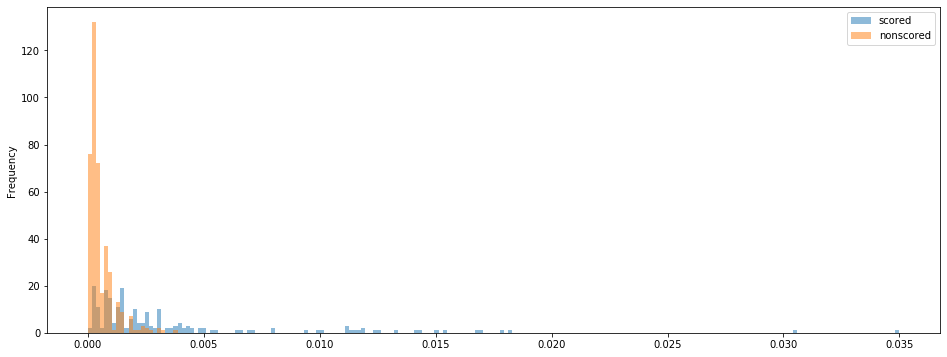

In [130]:
bins = np.linspace(0, 0.035, 200)
targets_scored.mean().plot('hist', bins=bins, label='scored', alpha=0.5)
targets_nonscored.mean().plot('hist', bins=bins, label='nonscored', alpha=0.5)

plt.legend(loc='best')
plt.show()

In [133]:
set(tname_scored).intersection(tname_nonscored)

set()

In [140]:
tname_scored[0].split('_')

['5-alpha', 'reductase', 'inhibitor']

In [146]:
keywords_scored = set()
for tname in tname_scored:
    keywords_scored = keywords_scored.union(tname.split('_'))

In [149]:
len(keywords_scored)

233

In [150]:
keywords_nonscored = set()
for tname in tname_nonscored:
    keywords_nonscored = keywords_nonscored.union(tname.split('_'))

In [151]:
len(keywords_nonscored)

485

In [154]:
len(keywords_scored.intersection(keywords_nonscored))

102

In [153]:
len(keywords_scored.union(keywords_nonscored))

616

In [160]:
for tname in tname_scored:
    kw = tname.split('_')
    for c in ['-', 'cc', '1', 'o', 'd', 'b']:
        if c in kw:
            print(tname)
            break

anesthetic_-_local
catechol_o_methyltransferase_inhibitor
cc_chemokine_receptor_antagonist
monopolar_spindle_1_kinase_inhibitor
vitamin_b
vitamin_d_receptor_agonist


In [162]:
sorted(tname_nonscored)

['abc_transporter_expression_enhancer',
 'abl_inhibitor',
 'ace_inhibitor',
 'acetylcholine_release_enhancer',
 'adenosine_deaminase_inhibitor',
 'adenosine_kinase_inhibitor',
 'adenylyl_cyclase_inhibitor',
 'age_inhibitor',
 'alcohol_dehydrogenase_inhibitor',
 'aldehyde_dehydrogenase_activator',
 'aldose_reductase_inhibitor',
 'alpha_mannosidase_inhibitor',
 'ampk_inhibitor',
 'androgen_biosynthesis_inhibitor',
 'angiotensin_receptor_agonist',
 'antacid',
 'anthelmintic',
 'antihypertensive',
 'antimetabolite',
 'antipruritic',
 'antirheumatic_drug',
 'antiseptic',
 'antispasmodic',
 'antithyroid_agent',
 'antitussive',
 'anxiolytic',
 'ap_inhibitor',
 'apolipoprotein_expression_enhancer',
 'apoptosis_inhibitor',
 'arf_inhibitor',
 'aryl_hydrocarbon_receptor_agonist',
 'aryl_hydrocarbon_receptor_antagonist',
 'aspartic_protease_inhibitor',
 'atherogenesis_inhibitor',
 'atherosclerosis_formation_inhibitor',
 'atp-sensitive_potassium_channel_agonist',
 'atp-sensitive_potassium_channel_i

In [163]:
sorted(tname_scored)

['11-beta-hsd1_inhibitor',
 '5-alpha_reductase_inhibitor',
 'acat_inhibitor',
 'acetylcholine_receptor_agonist',
 'acetylcholine_receptor_antagonist',
 'acetylcholinesterase_inhibitor',
 'adenosine_receptor_agonist',
 'adenosine_receptor_antagonist',
 'adenylyl_cyclase_activator',
 'adrenergic_receptor_agonist',
 'adrenergic_receptor_antagonist',
 'akt_inhibitor',
 'aldehyde_dehydrogenase_inhibitor',
 'alk_inhibitor',
 'ampk_activator',
 'analgesic',
 'androgen_receptor_agonist',
 'androgen_receptor_antagonist',
 'anesthetic_-_local',
 'angiogenesis_inhibitor',
 'angiotensin_receptor_antagonist',
 'anti-inflammatory',
 'antiarrhythmic',
 'antibiotic',
 'anticonvulsant',
 'antifungal',
 'antihistamine',
 'antimalarial',
 'antioxidant',
 'antiprotozoal',
 'antiviral',
 'apoptosis_stimulant',
 'aromatase_inhibitor',
 'atm_kinase_inhibitor',
 'atp-sensitive_potassium_channel_antagonist',
 'atp_synthase_inhibitor',
 'atpase_inhibitor',
 'atr_kinase_inhibitor',
 'aurora_kinase_inhibitor',
 '

In [164]:
print(len(tname_scored), len(tname_nonscored))

206 402


In [166]:
kw_scored = keywords_scored

In [167]:
kw_scored

{'-',
 '1',
 '11-beta-hsd1',
 '30s',
 '5-alpha',
 '50s',
 'acat',
 'acetylcholine',
 'acetylcholinesterase',
 'acid',
 'activator',
 'adenosine',
 'adenylyl',
 'adhesion',
 'adrenergic',
 'agent',
 'agonist',
 'akt',
 'aldehyde',
 'alk',
 'alkylating',
 'ampk',
 'amyloid',
 'analgesic',
 'androgen',
 'anesthetic',
 'angiogenesis',
 'angiotensin',
 'anhydrase',
 'antagonist',
 'anti-inflammatory',
 'antiarrhythmic',
 'antibiotic',
 'anticonvulsant',
 'antifolate',
 'antifungal',
 'antihistamine',
 'antimalarial',
 'antioxidant',
 'antiprotozoal',
 'antiviral',
 'apoptosis',
 'aromatase',
 'associated',
 'atm',
 'atp',
 'atp-sensitive',
 'atpase',
 'atr',
 'aurora',
 'autotaxin',
 'b',
 'bacterial',
 'bcl',
 'bcr-abl',
 'benzodiazepine',
 'beta',
 'blocker',
 'bromodomain',
 'btk',
 'calcineurin',
 'calcium',
 'cannabinoid',
 'carbonic',
 'casein',
 'caspase',
 'catechol',
 'cc',
 'cck',
 'cdk',
 'cell',
 'channel',
 'chelating',
 'chemokine',
 'chk',
 'chloride',
 'cholesterol',
 'choli

In [8]:
df = pd.DataFrame({
       "a_b": [1, 1, 1, 2, 2, 2],
       "b_c": [1, 1, 2, 1, 1, 2],
       "c_d": [1, 2, 1, 2, 1, 2],
       "id": [1, 2, 3, 4, 5, 6],})

df

,a_b,b_c,c_d,id
0,1,1,1,1
1,1,1,2,2
2,1,2,1,3
3,2,1,2,4
4,2,1,1,5
5,2,2,2,6


In [264]:
df2 = pd.melt(df, id_vars='id', var_name='lev', value_name='xxx')
df2

,id,lev,xxx
0,1,lev1,1
1,2,lev1,1
2,3,lev1,1
3,4,lev1,2
4,5,lev1,2
5,6,lev1,2
6,1,lev2,1
7,2,lev2,1
8,3,lev2,2
9,4,lev2,1


In [266]:
df3 = df2.pivot(index='id', columns='lev', values='xxx').reset_index(drop=False)
df3

lev,id,lev1,lev2,lev3
0,1,1,1,1
1,2,1,1,2
2,3,1,2,1
3,4,2,1,2
4,5,2,1,1
5,6,2,2,2


In [260]:
df3 = df2.pivot(index='id', columns='lev')['value'].reset_index(drop=False)
df3

lev,id,lev1,lev2,lev3
0,1,1,1,1
1,2,1,1,2
2,3,1,2,1
3,4,2,1,2
4,5,2,1,1
5,6,2,2,2


In [9]:
gene_features = [c for c in train.columns if c.startswith('g-')]
cell_features = [c for c in train.columns if c.startswith('c-')]
cate_features = [c for c in train.columns if c.startswith('cp_')]

train[gene_features + cell_features + cate_features].duplicated().any()

False

In [10]:
from tqdm.notebook import tqdm
import gc

In [16]:
class MultiLabelConverter():
    def __init__(self, label_names, id_name='sig_id'):
        self.id_name = id_name
        self.label_names = label_names
        
        self.keywords = set()
        for lb_name in label_names:
            self.keywords = self.keywords.union(lb_name.split('_'))
        
        self.keywords = sorted(list(self.keywords))
        
        self.map = dict()
        for lb_name in label_names:
            keywords = lb_name.split('_')
            self.map[lb_name] = [self.keywords.index(kw) for kw in keywords]
                
    def fit_transform(self, df):
        assert (self.id_name in df)
        for lb in self.label_names:
            if lb not in df:
                df[lb] = 0
        
        df_conv = df[[self.id_name] + self.label_names]
        df_conv = pd.melt(df_conv, id_vars=self.id_name, var_name='label_name', value_name='value')
        
        conv_mat = np.zeros((len(df_conv), len(self.keywords)), dtype=np.int8)
        for i, (lb_name) in tqdm(enumerate(df_conv['label_name'].values)):
            conv_mat[i, self.map[lb_name]] = 1
        
        for j, kw in enumerate(self.keywords):
            df_conv[kw] = conv_mat[:, j]
        
        df_conv[self.keywords] = df_conv[self.keywords].astype('int8')
        
        del conv_mat
        gc.collect()
        
        return df_conv
        
    def inverse_transform(self, df_conv):
        assert ('value' in df_conv)
        assert ('label_name' in df_conv)
        assert (self.id_name in df_conv)
        
        df = df_conv.drop(self.keywords, axis=1)
        df = df.pivot(index=self.id_name, columns='label_name', values='value').reset_index(drop=False)
        
        return df

In [17]:
df

,a_b,b_c,c_d,id
0,1,1,1,1
1,1,1,2,2
2,1,2,1,3
3,2,1,2,4
4,2,1,1,5
5,2,2,2,6


In [18]:
mlc = MultiLabelConverter(label_names=['a_b', 'b_c'], id_name='id')
# mlc = MultiLabelConverter(label_names=['a_b', 'b_c', 'c_d'], id_name='id')
df_conv = mlc.fit_transform(df)
df_conv

,id,label_name,value,a,b,c
0,1,a_b,1,1,1,0
1,2,a_b,1,1,1,0
2,3,a_b,1,1,1,0
3,4,a_b,2,1,1,0
4,5,a_b,2,1,1,0
5,6,a_b,2,1,1,0
6,1,b_c,1,0,1,1
7,2,b_c,1,0,1,1
8,3,b_c,2,0,1,1
9,4,b_c,1,0,1,1


In [19]:
mlc = MultiLabelConverter(label_names=['a_b', 'b_c'], id_name='id')
# mlc = MultiLabelConverter(label_names=['a_b', 'b_c', 'c_d'], id_name='id')
mlc.inverse_transform(df_conv)
# mlc.fit_transform(df, label_names=['a_b', 'b_c', 'c_d'], id_name='id')

label_name,id,a_b,b_c
0,1,1,1
1,2,1,1
2,3,1,2
3,4,2,1
4,5,2,1
5,6,2,2


In [20]:
df.merge(df_conv, on='id', how='right')

,a_b,b_c,c_d,id,label_name,value,a,b,c
0,1,1,1,1,a_b,1,1,1,0
1,1,1,1,1,b_c,1,0,1,1
2,1,1,2,2,a_b,1,1,1,0
3,1,1,2,2,b_c,1,0,1,1
4,1,2,1,3,a_b,1,1,1,0
5,1,2,1,3,b_c,2,0,1,1
6,2,1,2,4,a_b,2,1,1,0
7,2,1,2,4,b_c,1,0,1,1
8,2,1,1,5,a_b,2,1,1,0
9,2,1,1,5,b_c,1,0,1,1


In [21]:
df2 = pd.DataFrame({"id": [7, 8],})
df2

,id
0,7
1,8


In [22]:
mlc = MultiLabelConverter(label_names=['a_b', 'b_c', 'c_d'], id_name='id')
df2_conv = mlc.fit_transform(df2)

df2_conv

,id,label_name,value,a,b,c,d
0,7,a_b,0,1,1,0,0
1,8,a_b,0,1,1,0,0
2,7,b_c,0,0,1,1,0
3,8,b_c,0,0,1,1,0
4,7,c_d,0,0,0,1,1
5,8,c_d,0,0,0,1,1


In [23]:
mlc.inverse_transform(df2_conv)

label_name,id,a_b,b_c,c_d
0,7,0,0,0
1,8,0,0,0


In [333]:
train.head()

,sig_id,cp_type,cp_time,cp_dose,g-0,g-1,g-2,g-3,g-4,g-5,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,trt_cp,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,trt_cp,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,trt_cp,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,trt_cp,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,trt_cp,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [24]:
mlc = MultiLabelConverter(label_names=tname_scored[:2])
targets_conv = mlc.fit_transform(train)
targets_conv

,sig_id,label_name,value,11-beta-hsd1,5-alpha,inhibitor,reductase
0,id_000644bb2,5-alpha_reductase_inhibitor,0,0,1,1,1
1,id_000779bfc,5-alpha_reductase_inhibitor,0,0,1,1,1
2,id_000a6266a,5-alpha_reductase_inhibitor,0,0,1,1,1
3,id_0015fd391,5-alpha_reductase_inhibitor,0,0,1,1,1
4,id_001626bd3,5-alpha_reductase_inhibitor,0,0,1,1,1
...,...,...,...,...,...,...,...
47623,id_fffb1ceed,11-beta-hsd1_inhibitor,0,1,0,1,0
47624,id_fffb70c0c,11-beta-hsd1_inhibitor,0,1,0,1,0
47625,id_fffc1c3f4,11-beta-hsd1_inhibitor,0,1,0,1,0
47626,id_fffcb9e7c,11-beta-hsd1_inhibitor,0,1,0,1,0


In [25]:
targets_conv = train.merge(targets_conv, on='sig_id', how='right')
targets_conv.shape

(47628, 1088)

In [26]:
train.shape

(23814, 1082)

In [21]:
tmp['a'] = 0
tmp['b'] = 0

In [22]:
tmp[['a', 'b']] = np.ones((len(tmp), 2))

In [23]:
tmp

,a_b,b_c,c_d,id,a,b
0,1,1,1,1,1.0,1.0
1,1,1,2,2,1.0,1.0
2,1,2,1,3,1.0,1.0
3,2,1,2,4,1.0,1.0
4,2,1,1,5,1.0,1.0
5,2,2,2,6,1.0,1.0


In [40]:
A = np.array([[1, 0, 1], [0, 1, 0]])
A

array([[1, 0, 1],
       [0, 1, 0]])

In [41]:
B = np.array([[0, 0, 0], [1, 1, 1]])
B

array([[0, 0, 0],
       [1, 1, 1]])

In [42]:
from sklearn.metrics import log_loss

In [43]:
score = 0
for j in range(3):
    _score = log_loss(A[:, j], B[:, j])
    score += (_score / 3)
    
print(score)

23.026117462417186


In [46]:
print(A.flatten())
print(B.flatten())

[1 0 1 0 1 0]
[0 0 0 1 1 1]


In [47]:
log_loss(A.flatten(), B.flatten())

23.026117462417186

In [49]:
del targets_conv

In [50]:
import gc

In [51]:
gc.collect()

89

In [54]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (12, 12)

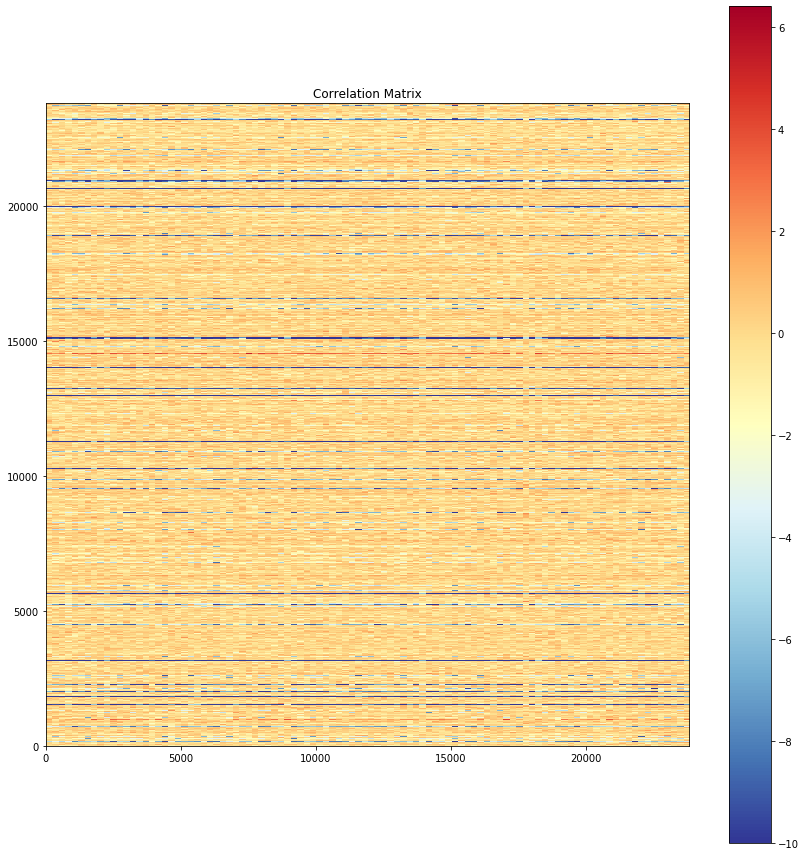

In [57]:
_ = plot_corr(train[cell_features])

In [58]:
os.listdir(os.path.join(input_dir))

['zip files',
 'train_targets_nonscored.csv',
 'train_drug.csv',
 '.DS_Store',
 'test_features.csv',
 'train_targets_scored.csv',
 'train_features.csv',
 'sample_submission.csv']

In [59]:
train_drug = pd.read_csv(os.path.join(input_dir, 'train_drug.csv'))

In [60]:
print(train.shape, train_drug.shape)

(23814, 1082) (23814, 2)


In [68]:
train = train.merge(train_drug, on='sig_id', how='left')
print(train.shape)

(23814, 1083)


In [69]:
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

In [76]:
vc = train['drug_id'].value_counts()
vc1 = vc.loc[vc <= 18].index.sort_values()
vc2 = vc.loc[vc > 18].index.sort_values()

In [84]:
tmp = train.groupby('drug_id')[tname_scored].mean().loc[vc1]

In [86]:
print(tmp.head())

           5-alpha_reductase_inhibitor  11-beta-hsd1_inhibitor  \
00199ff52                            0                       0   
00251fc41                            0                       0   
00321ea80                            0                       0   
0034c0847                            0                       0   
0060e686f                            0                       0   

           acat_inhibitor  acetylcholine_receptor_agonist  \
00199ff52               0                               0   
00251fc41               0                               0   
00321ea80               0                               0   
0034c0847               0                               0   
0060e686f               0                               0   

           acetylcholine_receptor_antagonist  acetylcholinesterase_inhibitor  \
00199ff52                                  0                               0   
00251fc41                                  0                               0

In [87]:
dct1 = {}
skf = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=0)
for fold, (train_idx, valid_idx) in enumerate(skf.split(tmp, tmp[tname_scored])):
    dd = {k: fold for k in tmp.index[valid_idx].values}
    dct1.update(dd)

/Users/wcc/01_Projects/04_Practice/05_GAN/venv3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass shuffle=True, random_state=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [89]:
tmp.index[valid_idx].values

array(['0034c0847', '00d2de1d8', '00dba5599', '015a48b37', '0166f205e',
       '02084574f', '0222d944c', '0233971e0', '02b14dcc0', '0393401cc',
       '03b09563c', '03b86deca', '04765e596', '047d037a9', '071afe3da',
       '07ab9d694', '08049cfd7', '08451084b', '0994324f7', '09dfe3a61',
       '09eea11d9', '0a5a4f458', '0ab9dd71b', '0b8cbbb45', '0d3228a10',
       '0d4080d56', '0ddc8c8dd', '0e8624227', '0f2ec8169', '0fc10b0bf',
       '108fb5b61', '10984cb4c', '10c7d51b1', '11325c559', '1191ff5f9',
       '11f421f4b', '126afe3ac', '12be3bd59', '12dc2e607', '12fd34362',
       '1371ab7d1', '13da34f0d', '143d04077', '14602ff38', '158113616',
       '15c8a8bc2', '15da4702d', '16059830d', '16c3d3bee', '16fc18110',
       '1748c1d01', '1787430b9', '17beda051', '17e32e2ca', '183c7e3f3',
       '18635b586', '18a406358', '18c37e601', '1908efe59', '19b95658c',
       '19d62c533', '1a30dbdd2', '1a892fd97', '1b20d8d8d', '1b5be72dc',
       '1b72f77e1', '1cc61abd7', '1cfcd915a', '1d61208e9', '1d83

In [90]:
tmp.head()

,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,adrenergic_receptor_agonist,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
00199ff52,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00251fc41,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00321ea80,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0034c0847,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0060e686f,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
tmp.index[:5].values

array(['00199ff52', '00251fc41', '00321ea80', '0034c0847', '0060e686f'],
      dtype=object)

In [93]:
skf = MultilabelStratifiedKFold(n_splits=5, shuffle=True, random_state=0)
tmp = train.loc[train['drug_id'].isin(vc2)].reset_index(drop=True)

print(tmp.shape)
print(tmp.head())

/Users/wcc/01_Projects/04_Practice/05_GAN/venv3/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass shuffle=True, random_state=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


(4008, 1083)
         sig_id      cp_type  cp_time cp_dose     g-0     g-1     g-2     g-3  \
0  id_0020d0484       trt_cp       48      D1  0.2711  0.5133 -0.1327  2.5950   
1  id_002fb9c19       trt_cp       48      D1  8.7380  0.1914  2.4380 -0.2930   
2  id_0054388ec  ctl_vehicle       48      D1 -0.6696 -0.2718 -1.2230 -0.6226   
3  id_0079af0fb  ctl_vehicle       24      D1 -0.1636 -1.8230 -0.5211  0.3054   
4  id_0079d45d3       trt_cp       24      D1  1.6310 -2.1430 -0.0943 -1.1990   

      g-4     g-5  ...  trpv_agonist  trpv_antagonist  tubulin_inhibitor  \
0  0.6980  0.5846  ...             0                0                  0   
1  3.2010  1.4910  ...             0                0                  0   
2 -0.7220  0.1588  ...             0                0                  0   
3 -1.1280  0.6041  ...             0                0                  0   
4  0.4869 -0.0935  ...             0                0                  0   

   tyrosine_kinase_inhibitor  ubiquitin_spe

In [98]:
dct2 = {}
for _fold, (train_idx, valid_idx) in enumerate(skf.split(tmp, tmp[tname_scored])):
    dd = {k: _fold for k in tmp.sig_id[valid_idx].values}
    dct2.update(dd)

In [103]:
tmp.index

RangeIndex(start=0, stop=4008, step=1)

In [110]:
a = [i for i in range(10)]

np.random.permutation(a)

array([6, 7, 5, 2, 8, 1, 3, 9, 4, 0])

In [111]:
tmp.index = np.random.permutation(tmp.index)

In [118]:
tmp['sig_id'][[0, 1, 2, 3, 4]]

0    id_36c537c0d
1    id_f57c5fc38
2    id_e0a365aee
3    id_80f76d144
4    id_595a8c65b
Name: sig_id, dtype: object

In [115]:
tmp['sig_id'].head(5)

819     id_0020d0484
1513    id_002fb9c19
1059    id_0054388ec
3511    id_0079af0fb
3892    id_0079d45d3
Name: sig_id, dtype: object

In [117]:
tmp['sig_id'].iloc[[0, 1, 2, 3, 4]]

819     id_0020d0484
1513    id_002fb9c19
1059    id_0054388ec
3511    id_0079af0fb
3892    id_0079d45d3
Name: sig_id, dtype: object